In [50]:
import sklearn
import numpy as np
import geopandas as gpd
import mahotas
import pylab
import mahotas as mh
import mahotas.demos

In [65]:
# Импорт базовых компонентов, обеспечивающих работу системы

from eolearn.core.eoworkflow import LinearWorkflow
from eolearn.core.eodata import FeatureType
from eolearn.core import LoadTask, EOPatch, EOTask, SaveTask, OverwritePermission
from eolearn.io import ExportToTiff, ImportFromTiff

from scipy.ndimage.filters import median_filter

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import_tiff = ImportFromTiff((FeatureType.DATA, 'dNBR'), folder = './dnbr_temp.tif')

save_to_patch = SaveTask(path = './final_eopatch', overwrite_permission=2, compress_level=0)

In [4]:
workflow_import = LinearWorkflow(import_tiff, save_to_patch)

In [5]:
result = workflow_import.execute()

In [6]:
patch = EOPatch.load('./final_eopatch')

In [7]:
patch

EOPatch(
  data: {
    dNBR: numpy.ndarray(shape=(1, 2482, 2308, 1), dtype=uint8)
  }
  mask: {}
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {}
  mask_timeless: {}
  scalar_timeless: {}
  label_timeless: {}
  vector_timeless: {}
  meta_info: {}
  bbox: BBox(((27.23914800000001, 51.60319800000001), (27.446488000000006, 51.741452000000024)), crs=CRS('4326'))
  timestamp: []
)

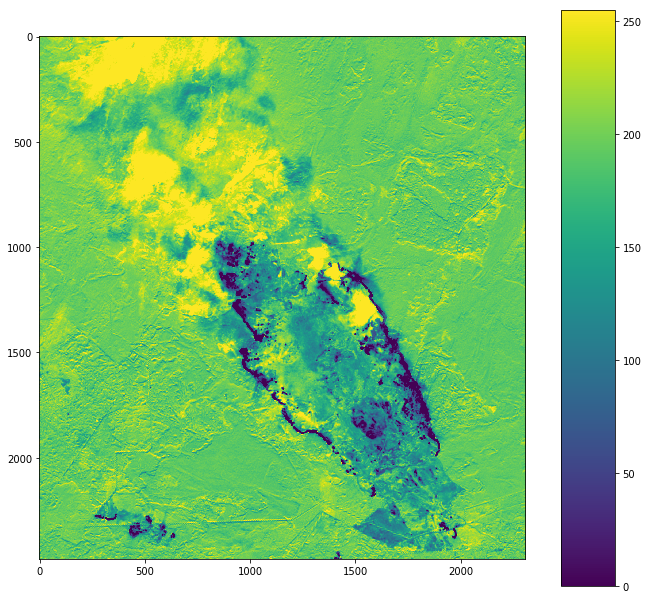

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(patch.data['dNBR'][0].squeeze());

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [66]:
# Реализация дополнительного функционала, расширяющего базовый
# Создание собственной задачи по автоматической кластеризации при помощи наследования от базового класса задач - EOTask

class Binarization(EOTask):
    """
    step 1:
    median filter size = 15 for filtering
    step 2:
    method Otsu's for automatic binarization
    """
    def __init__(self, feature_name, dnbr):  #, band_b):
        self.feature_name = feature_name
        
        self.dnbr_fetaure_name = dnbr.split('/')[0]
#         self.band_b_fetaure_name = band_b.split('/')[0]
        
        self.dnbr_fetaure_idx = int(dnbr.split('/')[-1])
#         self.band_b_fetaure_idx = int(band_b.split('/')[-1])

    def execute(self, eopatch):
        
        dnbr = eopatch.data[self.dnbr_fetaure_name][..., self.dnbr_fetaure_idx]
#         band_b = eopatch.data[self.band_b_fetaure_name][..., self.band_b_fetaure_idx]

#       filtration 
#         filtered = median_filter(binary, size = 15)
        filtered_image = median_filter(dnbr, size = 2)

#       binarisation
#         im = filtered_image
    
#       Now, we compute Otsu:
        t = mh.otsu(filtered_image)

#       finally, we use the value to form a binary image:
        binary_image = (filtered_image > t)
    
        binary_image = binary_image.astype(int)

        eopatch.add_feature(FeatureType.DATA, self.feature_name, binary_image[..., np.newaxis])

        return eopatch  

In [67]:
load = LoadTask('./final_eopatch')

binarization = Binarization('BIN', 'dNBR/0')

export_tiff = ExportToTiff((FeatureType.DATA, 'BIN'), folder = './predicted_tiff/BIN.tiff')

save_to_bin = SaveTask(path = './BIN_patch', overwrite_permission=2, compress_level=0)

In [68]:
workflow_bin = LinearWorkflow(load, binarization, export_tiff, save_to_bin)

In [71]:
result = workflow_bin.execute()

In [70]:
result

WorkflowResults(
  Dependency(SaveTask):
    EOPatch(
      data: {
        BIN: numpy.ndarray(shape=(1, 2482, 2308, 1), dtype=int32)
        dNBR: numpy.ndarray(shape=(1, 2482, 2308, 1), dtype=uint8)
      }
      mask: {}
      scalar: {}
      label: {}
      vector: {}
      data_timeless: {}
      mask_timeless: {}
      scalar_timeless: {}
      label_timeless: {}
      vector_timeless: {}
      meta_info: {}
      bbox: BBox(((27.23914800000001, 51.60319800000001), (27.446488000000006, 51.741452000000024)), crs=CRS('4326'))
      timestamp: []
    )
)

In [9]:
import numpy as np
import mahotas
import pylab
import mahotas as mh
import mahotas.demos

In [19]:
import mahotas as mh
import mahotas.demos

im = mahotas.imread('./dnbr_temp.tif')
# im is stored as RGB, let's convert to single 2D format:
#im = im.max(2)

#Now, we compute Otsu:
t = mh.otsu(im)

# finally, we use the value to form a binary image:
binary = (im > t)

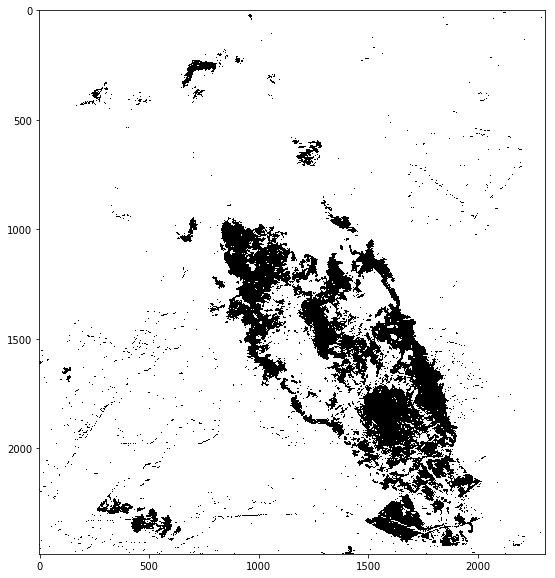

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(binary.squeeze());

In [24]:
import scipy
from scipy.ndimage.filters import median_filter

In [41]:
# filtered = median_filter(binary, size = 15)
filtered2 = median_filter(patch.data['dNBR'], size = 10)

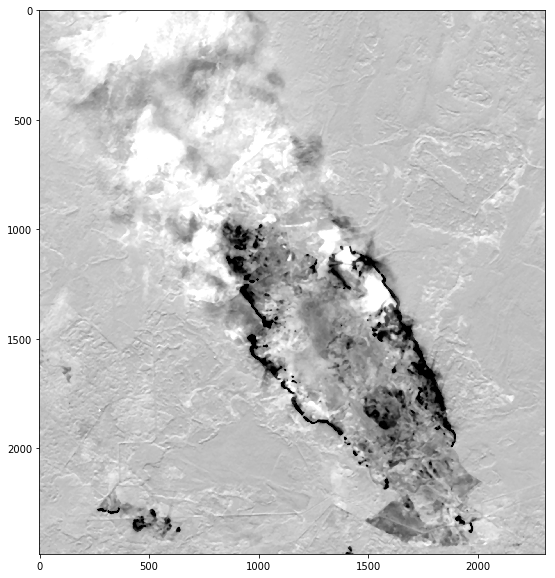

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(filtered2.squeeze());

In [44]:
im = filtered2
# im is stored as RGB, let's convert to single 2D format:
#im = im.max(2)

#Now, we compute Otsu:
t = mh.otsu(im)

# finally, we use the value to form a binary image:
binary2 = (im > t)

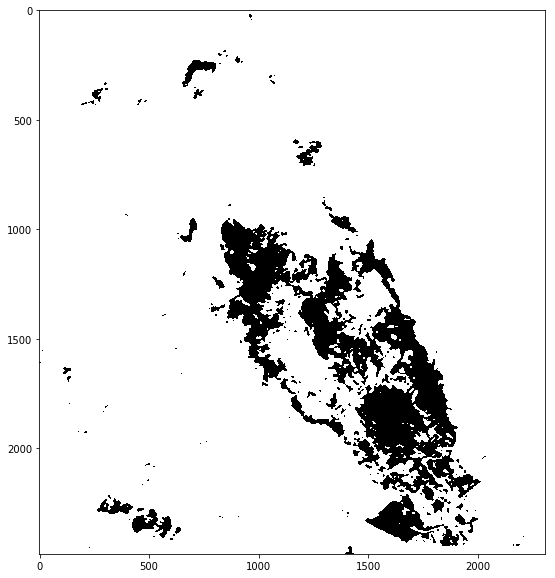

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(binary2.squeeze());